/var/folders/bb/qxcf7b0d1zzbx6vt008mk2r00000gn/T/ipykernel_42079/1233956105.py:37: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


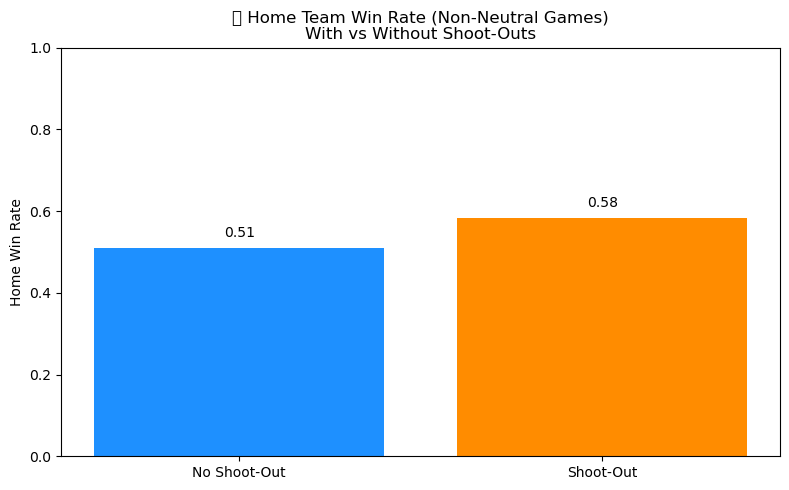

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('shoot_out_advantage.db')

# Read relevant data
df = pd.read_sql_query("""
    SELECT shoot_out, neutral_location, home_team_result
    FROM fifa_world_cup
""", conn)
conn.close()

# Filter only matches where home team advantage applies (not neutral)
df = df[df['neutral_location'] == 0]

# Convert home_team_result to binary: 1 for win, 0 for draw/lose
df['home_win'] = df['home_team_result'].str.lower().map(lambda x: 1 if x == 'win' else 0)

# Group by shoot_out and calculate win rate
grouped = df.groupby('shoot_out')['home_win'].mean().reset_index()
grouped['shoot_out'] = grouped['shoot_out'].map({0: 'No Shoot-Out', 1: 'Shoot-Out'})

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['shoot_out'], grouped['home_win'], color=['dodgerblue', 'darkorange'])
plt.title("🏠 Home Team Win Rate (Non-Neutral Games)\nWith vs Without Shoot-Outs")
plt.ylabel("Home Win Rate")
plt.ylim(0, 1)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
